In [1]:
import pandas as pd
import numpy as np

Подгружаю вспомогательные файлы из таблицы

In [2]:
diseases = pd.read_csv('../../../project/diseases.csv')
#diseases = diseases.append({'original':'ketoacidosis diabetic','dataset':'OHAS','unified':'Диабетический кетоацидоз',
#                           'disease_id':diseases.disease_id.max()+1}, ignore_index=True)
diseases.head()

,Unnamed: 0,original,dataset,unified,disease_id
0,0,Heart Disease,eg,Заболевание сердца,1.0
1,1,Viral Fever or Cold,eg,Простуда,2.0
2,2,Jaundice,eg,Желтуха,3.0
3,3,Food poisoning,eg,Пищевое отравление,4.0
4,4,Patient is normal,eg,-,NaN


In [3]:
symptoms = pd.read_csv('../../../project/symptoms.csv')
symptoms = symptoms.append({'original':'hyperemesis','dataset':'OHAS','unified':'--',
                           'symptom_id':np.nan}, ignore_index=True)
symptoms = symptoms.append({'original':'spasm','dataset':'OHAS','unified':'Спазмы',
                           'symptom_id':76.0}, ignore_index=True)
symptoms.head(6)

,Unnamed: 0,original,dataset,unified,symptom_id
0,0.0,L.A. Pain,eg,Боль в животе,1.0
1,1.0,U.A. pain,eg,Боль в животе,1.0
2,2.0,Vomiting feeling,eg,Рвота,2.0
3,3.0,Yellowship Urine,eg,Неестественная желтизна мочи,3.0
4,4.0,Indigestion,eg,Несварение,4.0
5,5.0,Temperature,eg,Повышенная температура,5.0


Итоговый датасет. Столбцы - айдишники симптомов, в последнем будем айди болезни.

In [4]:
data = pd.DataFrame(columns = list(map(int,symptoms['symptom_id'].dropna().unique().tolist())) + ['disease_id'])
#data.columns = symptoms['symptom_id'].unique().tolist() + ['disease_id']
data.head()

,1,2,3,4,5,6,7,8,9,10,...,265,266,267,268,269,270,271,272,273,disease_id


## EG dataset

In [5]:
eg_data = pd.read_csv('../../../project/raw_data/eg/data.csv')
eg_data.head()

,Disease,Temperature,Pulse Rate,L.A Pain,U.A Pain,Vomiting Feeling,Yellowish Urine,Indigestion
0,0,10,13.8,0,10,0,0,0
1,1,11,13.6,10,10,0,0,0
2,2,13,14.0,10,0,0,10,0
3,3,11,12.8,0,0,10,0,10
4,0,14,15.0,0,10,0,0,0


Небольшая обработка

0: Heart Disease
1: Viral Fever or Cold
2: Jaundice
3: Food Poisoning
4: Patient is normal

In [6]:
eg_data.loc[eg_data.Disease == 0, 'Disease'] = 'Heart Disease '
eg_data.loc[eg_data.Disease == 1, 'Disease'] = 'Viral Fever or Cold '
eg_data.loc[eg_data.Disease == 2, 'Disease'] = 'Jaundice'
eg_data.loc[eg_data.Disease == 3, 'Disease'] = 'Food poisoning'
eg_data.loc[eg_data.Disease == 4, 'Disease'] = 'Patient is normal'

eg_data.loc[eg_data.Temperature > 10, 'Temperature'] = 1
eg_data.loc[eg_data.Temperature == 10, 'Temperature'] = 0
eg_data.drop('Pulse Rate', axis = 1, inplace = True)

In [7]:
for column in eg_data.columns[2:]:
    eg_data.loc[eg_data[column] == 10, column] = 1

In [8]:
eg_data.head()

,Disease,Temperature,L.A Pain,U.A Pain,Vomiting Feeling,Yellowish Urine,Indigestion
0,Heart Disease,0,0,1,0,0,0
1,Viral Fever or Cold,1,1,1,0,0,0
2,Jaundice,1,1,0,0,1,0
3,Food poisoning,1,0,0,1,0,1
4,Heart Disease,1,0,1,0,0,0


Теперь итерационная обработка и добавление в итоговый набор

In [9]:
for index, record in eg_data.iterrows():
    #создаю новую запись, заполняю все нулями
    new_row = dict.fromkeys(data.columns, 0)
    #если пациент в норме, он не обрабатывается
    if record.Disease == 'Patient is normal':
        continue
    #беру из diseases нужный айдишник по original названию и вставляю в поле diseases_id
    new_row['disease_id'] = int(diseases.loc[(diseases.dataset == 'eg') & (diseases.original == record.Disease), 
                                                'disease_id'].values[0])
    #вручную симптомы
    new_row[symptoms.loc[(symptoms.dataset == 'eg') & (symptoms.original == 'Temperature'), 'symptom_id'].values[0]] = record.Temperature
    new_row[symptoms.loc[(symptoms.dataset == 'eg') & (symptoms.original == 'L.A. Pain'), 'symptom_id'].values[0]] = record['L.A Pain']
    new_row[symptoms.loc[(symptoms.dataset == 'eg') & (symptoms.original == 'U.A. pain'), 'symptom_id'].values[0]] = record['U.A Pain']
    new_row[symptoms.loc[(symptoms.dataset == 'eg') & (symptoms.original == 'Vomiting feeling'), 'symptom_id'].values[0]] = record['Vomiting Feeling']
    new_row[symptoms.loc[(symptoms.dataset == 'eg') & (symptoms.original == 'Yellowship Urine'), 'symptom_id'].values[0]] = record['Yellowish Urine']
    new_row[symptoms.loc[(symptoms.dataset == 'eg') & (symptoms.original == 'Indigestion'), 'symptom_id'].values[0]] = record['Indigestion']
    #вставляю новую строку в итоговый набор
    data = data.append(new_row, ignore_index=True)

In [10]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,265,266,267,268,269,270,271,272,273,disease_id
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## OHAS dataste

In [11]:
ohas_data = pd.read_csv('../../../project/raw_data/OHAS/OHAS Dataset.csv')
ohas_data.head()

,Disease,Disease_CUI,Symptoms,Symptom_CUI,Weight,Height,Intensity,Severity,Age,Gender,BMI_Level,Region,Season
0,influenza,C0162565,uncoordi162tion,C0039239,68,180,high,medium,24,female,27.900,southwest,Summer
1,influenza,C0162565,fever,C0000737,68,170,low,medium,23,male,33.770,southeast,Summer
2,influenza,C0162565,pleuritic pain,C0235704,68,162,low,low,24,male,33.000,southeast,Summer
3,influenza,C0162565,snuffle,C0030554,68,162,high,medium,34,male,22.705,northwest,Summer
4,influenza,C0162565,throat sore,C0030552,68,185,low,high,21,male,28.880,northwest,Winter


Будем считать каждого пациента уникальной комбинацией пола, возраста, роста, веса и болезни. Для большего удобства создадим временный датафрейм

In [12]:
temp = pd.DataFrame(columns = ['Disease','Symptoms'])
temp['Disease'] = ohas_data.groupby(['Gender','Age','Weight','Height','Disease'])['Disease'].max()
temp['Symptoms'] = ohas_data.groupby(['Gender','Age','Weight','Height','Disease'])['Symptoms'].unique()
temp.reset_index(inplace=True, drop=True)

In [13]:
temp.head()

,Disease,Symptoms
0,adenocarcinoma,[pain abdomi162l]
1,upper respiratory infection,[egophony]
2,mitral valve insufficiency,"[asymptomatic, dyspnea]"
3,cirrhosis,[fall]
4,depressive disorder,[mood depressed]


Итерационная обработка

In [14]:
for index, record in temp.iterrows():
    record_symptoms = record.Symptoms.tolist()
    
    new_row = dict.fromkeys(data.columns, 0)
    
    #print(record.Disease)
    disease = record.Disease.replace('162','na').strip()
    disease = int(diseases.loc[(diseases.dataset == 'OHAS') & (diseases.original == disease), 
                               'disease_id'].values[0])
    #print(disease)
    if np.isnan(disease):
        continue
    else:
        new_row['disease_id'] = disease
    
    for symptom in record_symptoms:
        #print(symptom)
        #если нет симптомов
        if symptom == np.nan:
            continue
        #если в симптоме стоит nan
        try:
            symptom = symptom.replace('162','na').strip()
        except AttributeError:
            continue
        #
        try:
            symptom_id = int(symptoms.loc[(symptoms.dataset == 'OHAS') & (symptoms.original == symptom), 'symptom_id'].values[0])
            new_row[symptom_id] = 1
        except ValueError:
            continue
        #print(symptom_id)
    data = data.append(new_row, ignore_index=True)

## dsp dataset

In [15]:
dsp_data = pd.read_csv('../../../project/raw_data/dsp/dataset.csv')
dsp_data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
N = len(dsp_data)
for person_num in range(N):
    #print(person_num)
    new_row = dict.fromkeys(data.columns, 0)
    
    symptoms_person = dsp_data.loc[person_num, 'Symptom_1':'Symptom_17']
    disease_person = dsp_data.loc[person_num, 'Disease']
    
    for s in symptoms_person:
        if type(s) == str:
            s = s.replace(' ', '')
            s = s.replace('_', ' ')
        if s in symptoms.loc[symptoms.dataset == 'dsp','original'].values:
            try:
                symptom_id = int(symptoms.loc[(symptoms.dataset == 'dsp') & (symptoms.original == s), 'symptom_id'].values[0])
                new_row[symptom_id] = 1
            except ValueError:
                continue
    
    if disease_person in diseases.loc[diseases.dataset == 'dsp','original'].values:
        disease_id = int(diseases.loc[(diseases.dataset == 'dsp') & (diseases.original == disease_person),'disease_id'].values[0])
        new_row['disease_id'] = disease_id
            
    data = data.append(new_row, ignore_index=True)

## Итоговый датафрейм

In [17]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,265,266,267,268,269,270,271,272,273,disease_id
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7427 entries, 0 to 7426
Columns: 274 entries, 1 to disease_id
dtypes: object(274)
memory usage: 15.5+ MB


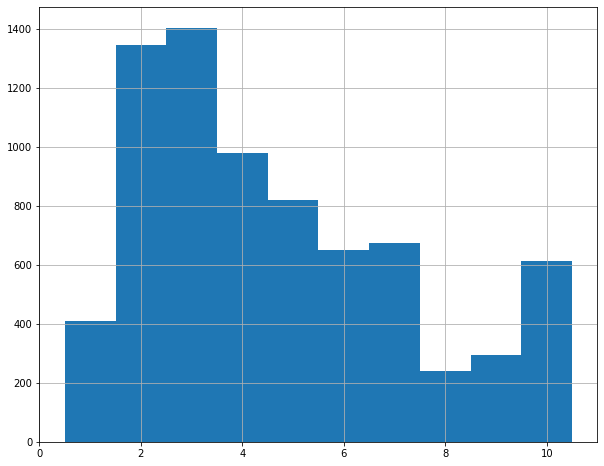

In [28]:
data.drop('disease_id',axis=1).sum(axis=1).hist(figsize = (10,8), bins=10, align='mid')

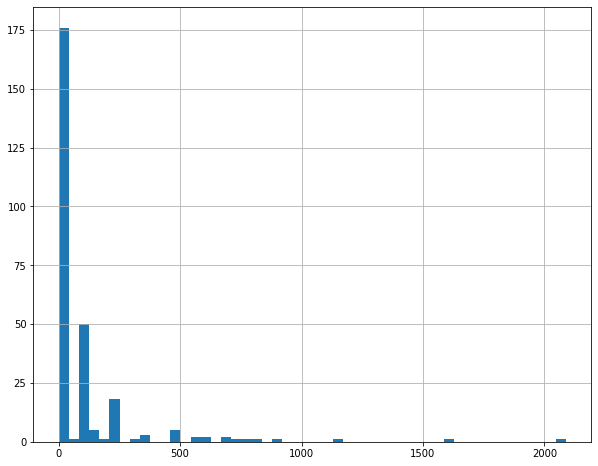

In [26]:
data.drop('disease_id',axis=1).sum(axis=0).hist(bins=50, figsize = (10,8))

In [29]:
#сохраним файлы
data.to_csv('../../../project/data.csv')
symptoms.to_csv('../../../project/symptoms.csv')
diseases.to_csv('../../../project/diseases.csv')